# Constitution des bases de données 
Cette première cellule vous présente la manière avec laquelle j'ai obtenu les features/caractéristiques à partir des jeux de données de "textes"
Pour obtenir les textes (et les "filtrer") j'ai utiliser le script ./textDatasets/conversion.sh (qui prends, par exemple les fichiers FR_* les concatene, supprime les accents (en gardant les caracteres sans accents) et enfin transforme en minuscules).
J'ai utilisé les livres "open data" de la base du site Guttenberg Project (qui archive énormément de livres en texte, "txt" simples", tombés dans le domaine publique).

## Code réalisé par R. Cogranne

In [1]:
import numpy as np
import string
BlockSz=1000

# On procede de la même façon pour les differents languages
# Ouverture du fichier texte contenant les caracteres alphabetiques "brutes"
textGERMAN = open('../input/GERMAN')
# Lecture
DE=textGERMAN.read()
textGERMAN.close()
# Calcule du nombre de blocks (arrondi par defaut) de BlockSz caracteres
NbBlock=int(np.floor(len(DE)/BlockSz))
# Creation des tableaux de donnees textuelles et de features
DataDE=[]
FeaDE =[]
# Pour tous les indices de blocks ...
for index in range(NbBlock):
    # Exctraction des donnees texte du block
    DataDE.append(DE[index*BlockSz:(index+1)*BlockSz])
    # Comptage de chacun des caracteres
    countDE=[]
    for letter in string.ascii_lowercase:
        countDE.append(DataDE[index].count(letter))
    # Comptage de toutes les 26**2 paires de caracteres possibles
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countDE.append(DataDE[index].count(letter1+letter2))
    # Une fois le vecteur de décompte obtenu  .... on ajoute ce vecteur (contenant tous les decomptes) au tableaux des features
    FeaDE.append(countDE)

# On procede de la même façon pour les differents languages ....
textFRENCH = open('../input/FRENCH')
FR=textFRENCH.read()
textFRENCH.close()
NbBlock=int(np.floor(len(FR)/BlockSz))
DataFR=[]
FeaFR =[]
for index in range(NbBlock):
    DataFR.append(FR[index*BlockSz:(index+1)*BlockSz])
    countFR=[]
    for letter in string.ascii_lowercase:
        countFR.append(DataFR[index].count(letter))
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countFR.append(DataFR[index].count(letter1+letter2))
    FeaFR.append(countFR)

# On procede de la même façon pour les differents languages ....
textSPANISH = open('../input/SPANISH')
ES=textSPANISH.read()
textSPANISH.close()
NbBlock=int(np.floor(len(ES)/BlockSz))
DataES=[]
FeaES =[]
for index in range(NbBlock):
    DataES.append(ES[index*BlockSz:(index+1)*BlockSz])
    countES=[]
    for letter in string.ascii_lowercase:
        countES.append(DataES[index].count(letter))
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countES.append(DataES[index].count(letter1+letter2))
    FeaES.append(countES)

# On procede de la même façon pour les differents languages ....
textENGLISH = open('../input/ENGLISH')
EN=textENGLISH.read()
textENGLISH.close()
NbBlock=int(np.floor(len(EN)/BlockSz))
DataEN=[]
FeaEN =[]
for index in range(NbBlock):
    DataEN.append(EN[index*BlockSz:(index+1)*BlockSz])
    countEN=[]
    for letter in string.ascii_lowercase:
        countEN.append(DataEN[index].count(letter))
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countEN.append(DataEN[index].count(letter1+letter2))
    FeaEN.append(countEN)

In [2]:
# Ici on sauvegarde les caracteristiques, pour eviter de les recalculer à chaque fois ....
np.save('./FeaEN.npy', FeaEN)
np.save('./FeaFR.npy', FeaFR)
np.save('./FeaDE.npy', FeaDE)
np.save('./FeaES.npy', FeaES)

In [3]:
# ... On peut simplement les loader (et commenter les cellules precedentes)
FeaEN = np.load('./FeaEN.npy')
FeaFR = np.load('./FeaFR.npy')
FeaDE = np.load('./FeaDE.npy')
FeaES = np.load('./FeaES.npy')

In [4]:
# Pour plus de "facilier de manipulation" on trasforme les donnes en "matrice numpy" et on affiche la dimension de la base de donnees.
FeaDE = np.array(FeaDE)
print(FeaDE.shape)

FeaFR = np.array(FeaFR)
print(FeaFR.shape)

FeaES = np.array(FeaES)
print(FeaES.shape)

FeaEN = np.array(FeaEN)
print(FeaEN.shape)

(4329, 702)
(4116, 702)
(4321, 702)
(4209, 702)


## Refactorisation du code pour comprendre la constitution des données

### Librairies

In [5]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Uniquement pour enlever les warning de certaines méthodes (peut être mis en commentaires)
#import sys
#if not sys.warnoptions:
#    import warnings
#    warnings.simplefilter("ignore")

### Découpage en fonctions

In [6]:
#Fonction Feature qui permet à partir d'un fichier de comptabiliser le nombre d'occurences d'un caractère, le nombre d'occurences de deux caractères
def GenerateFeature(filename, BlockSz=1000) :
    # Ouverture du fichier texte contenant les caracteres alphabetiques "brutes"
    textCountry = open(filename)
    # Lecture
    content=textCountry.read()
    textCountry.close()
    # Calcule du nombre de blocks (arrondi par defaut) de BlockSz caracteres
    NbBlock=int(np.floor(len(content)/BlockSz))
    # Creation des tableaux de donnees textuelles et de features
    Data=[]
    Fea =[]
    # Pour tous les indices de blocks ...
    for index in range(NbBlock):
        # Exctraction des donnees texte du block
        Data.append(content[index*BlockSz:(index+1)*BlockSz])
        # Comptage de chacun des caracteres
        countCaracter=[]
        for letter in string.ascii_lowercase:
            countCaracter.append(Data[index].count(letter))
        # Comptage de toutes les 26**2 paires de caracteres possibles
        for letter1 in string.ascii_lowercase:
            for letter2 in string.ascii_lowercase:
                countCaracter.append(Data[index].count(letter1+letter2))
        # Une fois le vecteur de décompte obtenu  .... on ajoute ce vecteur (contenant tous les decomptes) au tableaux des features
        Fea.append(countCaracter)
    return Fea

In [7]:
import os
#Permet de générer la matrix en fonction d'un fichier d'entrée ou d'un fichier numpy si le travail sur le texte a déjà été réalisé
def GenerateMatrix(filenameIn, fileConvertNpy, BlockSz=1000):
    if(os.path.exists(fileConvertNpy)):
        feature = np.load(fileConvertNpy)
        return np.array(feature)
    else :
        feature = GenerateFeature(filenameIn, BlockSz)
        np.save(fileConvertNpy, feature)
        return np.array(feature)

In [8]:
germanArray = GenerateMatrix('../input/GERMAN', './FeatureDE.npy')
print("Shape german : " +str(germanArray.shape))
frenchArray = GenerateMatrix('../input/FRENCH', './FeatureFR.npy')
print("Shape french : " +str(frenchArray.shape))
spanishArray = GenerateMatrix('../input/SPANISH', './FeatureSP.npy')
print("Shape spanish : " +str(spanishArray.shape))
englishArray = GenerateMatrix('../input/ENGLISH', './FeatureEN.npy')
print("Shape english : " +str(englishArray.shape))


Shape german : (4329, 702)
Shape french : (4116, 702)
Shape spanish : (4321, 702)
Shape english : (4209, 702)


In [9]:
print("Verification German Array : ", (germanArray - FeaDE).sum())
print("Verification French Array : ", (frenchArray - FeaFR).sum())
print("Verification Spanish Array : ", (spanishArray - FeaES).sum())
print("Verification English Array : ", (englishArray - FeaEN).sum())

Verification German Array :  0
Verification French Array :  0
Verification Spanish Array :  0
Verification English Array :  0


Le code permet de comptabiliser dans un ensemble de textes concaténées et nettoyées via Conversion.sln :
* le nombre de lignes correspond au découpage du fichier consolidé en block de 1000 caractères
* les 26 premières colonnes correspondent au nombre d'occurences sur la ligne du nombre de A, ..., Z
* les 26 colonnes suivantes correspondent au nombre d'occurences de la succession de caractères AA, AB, ..., AZ
* les 26 colonnes suivantes correspondent au nombre d'occurences de la succession de caractères BA, BB, ..., BZ
* ...
* les 26 dernières colonnes correspondent au nombre d'occurences de la succession de caractères ZA, ZB, ..., ZZ

On retrouve bien que le nombre de colonnes 26 + 26*26

### Construction Dataframe

Les dataframe Panda sont pratiques notamment pour avoir des colonnes associées à la matrice de données.

In [10]:
#Permet de construire la liste a, b, ...,z, aa, ..., az, ..., zz
def BuildListColumn():
    listColumn = []
    for letter in string.ascii_lowercase:
        listColumn.append(letter)
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            listColumn.append(letter1+letter2)
    return listColumn

In [11]:
def BuildDataFrame(data, listColumn):
    return pd.DataFrame(data, columns = listColumn)

In [12]:
listColumn = BuildListColumn()
df_spanish = BuildDataFrame(spanishArray,listColumn) 
df_german = BuildDataFrame(germanArray,listColumn)
df_french = BuildDataFrame(frenchArray,listColumn)
df_english = BuildDataFrame(englishArray,listColumn)

### Suppression des colonnes vides

On identifie par langue les colonnes où le caractère est nul sur l'intégralité des lignes.

In [13]:
frenchEmptyColumn = [ val for val in listColumn if df_french[val].sum()==0]
spanishEmptyColumn = [ val for val in listColumn if df_spanish[val].sum()==0]
englishEmptyColumn = [ val for val in listColumn if df_english[val].sum()==0]
germanEmptyColumn = [ val for val in listColumn if df_german[val].sum()==0]
print("Empty French Column : " + str(len(frenchEmptyColumn)))
print("Empty Spanish Column : " + str(len(spanishEmptyColumn)))
print("Empty English Column : " + str(len(englishEmptyColumn)))
print("Empty German Column : " + str(len(germanEmptyColumn)))

Empty French Column : 42
Empty Spanish Column : 58
Empty English Column : 58
Empty German Column : 28


On supprime ensuite en faisant l'intersection des colonnes vides pour l'ensemble des langues ce qui nous permet d'identifier une suite de caractères inutiles quelque soit la langue.

In [14]:
intersectionEmpty = set(frenchEmptyColumn).intersection(spanishEmptyColumn).intersection(englishEmptyColumn).intersection(germanEmptyColumn)
print("Drop Column : " + str(len(intersectionEmpty)))
df_french.drop(intersectionEmpty, axis=1, inplace=True)
df_spanish.drop(intersectionEmpty, axis=1, inplace=True)
df_german.drop(intersectionEmpty, axis=1, inplace=True)
df_english.drop(intersectionEmpty, axis=1,inplace=True)

Drop Column : 6


In [15]:
intersectionEmpty

{'jx', 'kx', 'qw', 'qx', 'qy', 'qz'}

Pour des optimisations ultérieures dans les comparaisons deux à deux des langues, on va mettre à jour la liste des colonnes vides de chaque langue

In [16]:
for colEmpty in intersectionEmpty:
    frenchEmptyColumn.remove(colEmpty)
    spanishEmptyColumn.remove(colEmpty)
    englishEmptyColumn.remove(colEmpty)
    germanEmptyColumn.remove(colEmpty)
print("Empty French Column after drop : " + str(len(frenchEmptyColumn)))
print("Empty Spanish Column after drop : " + str(len(spanishEmptyColumn)))
print("Empty English Column after drop : " + str(len(englishEmptyColumn)))
print("Empty German Column after drop : " + str(len(germanEmptyColumn)))

Empty French Column after drop : 36
Empty Spanish Column after drop : 52
Empty English Column after drop : 52
Empty German Column after drop : 22


### Un peu de statistique descriptive sur les dataframe

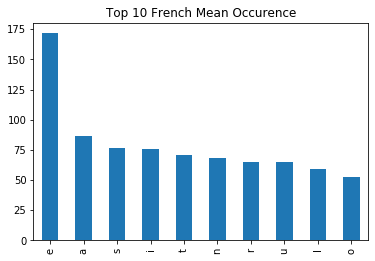

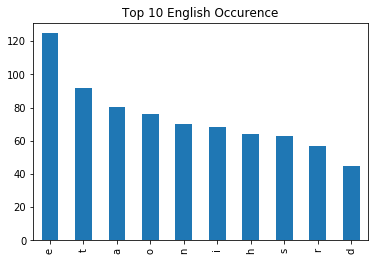

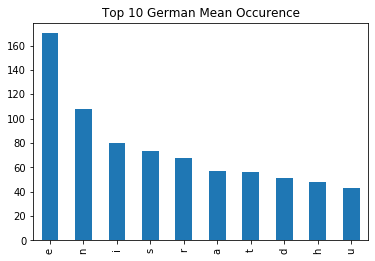

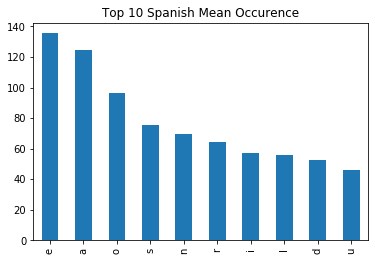

In [17]:
df_top_french_Occ = df_french.mean().sort_values(ascending=False)[0:10].to_frame("Max occurence")
df_top_english_Occ = df_english.mean().sort_values(ascending=False)[0:10].to_frame("Max occurence")
df_top_german_Occ = df_german.mean().sort_values(ascending=False)[0:10].to_frame("Max occurence")
df_top_spanish_Occ = df_spanish.mean().sort_values(ascending=False)[0:10].to_frame("Max occurence")

df_top_french_Occ.plot.bar(title="Top 10 French Mean Occurence", legend=False)
df_top_english_Occ.plot.bar(title="Top 10 English Occurence", legend=False)
df_top_german_Occ.plot.bar(title="Top 10 German Mean Occurence", legend=False)
df_top_spanish_Occ.plot.bar(title="Top 10 Spanish Mean Occurence", legend=False)

Analyse :
* Sans surprise, ce sont 1 seule lettre qui ressorte dans le Top 10 par rapport à la succession de 2 lettres
* La voyelle e est la lettre qui est la plus représentée quelque soit la langue
* Le a se place en deuxième pour l'espagnol et le français, en troisième place pour l'anglais et en 6ème place pour l'allemand
* On peut voir des singularités sur l'occurence de certaines lettres comme le t qui est présent de manière plus significative en français que dans les autres langues ou le n pour l'allemand.

Regardons les occurences de 2 caractères pour voir s'il y a des caractères discriminants qui apportent peut-être plus d'informations que l'occurence d'une lettre

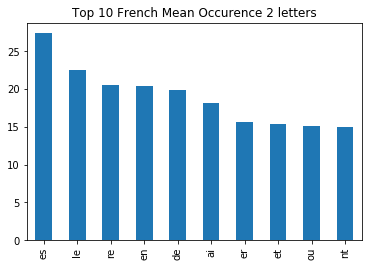

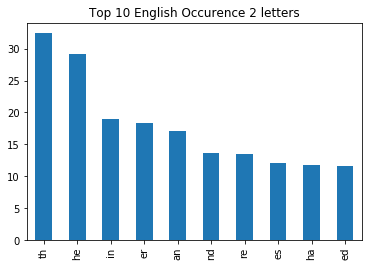

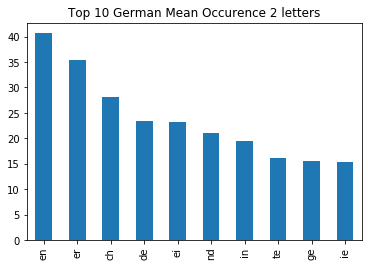

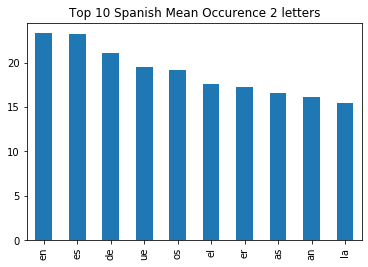

In [18]:
df_top_french_Occ2 = df_french.iloc[:,26:].mean().sort_values(ascending=False)[0:10].to_frame("Max occurence")
df_top_english_Occ2 = df_english.iloc[:,26:].mean().sort_values(ascending=False)[0:10].to_frame("Max occurence")
df_top_german_Occ2 = df_german.iloc[:,26:].mean().sort_values(ascending=False)[0:10].to_frame("Max occurence")
df_top_spanish_Occ2 = df_spanish.iloc[:,26:].mean().sort_values(ascending=False)[0:10].to_frame("Max occurence")
df_top_french_Occ2.plot.bar(title="Top 10 French Mean Occurence 2 letters", legend=False)
df_top_english_Occ2.plot.bar(title="Top 10 English Occurence 2 letters", legend=False)
df_top_german_Occ2.plot.bar(title="Top 10 German Mean Occurence 2 letters", legend=False)
df_top_spanish_Occ2.plot.bar(title="Top 10 Spanish Mean Occurence 2 letters", legend=False)

On peut voir des différences entre les langues avec : 
* es qui est par exemple la suite de lettres la plus présente en français et qui n'apparait pas dans le top 10 allemand alors qu'il apparait en anglais(8) /espagnol (2) avec un merit order différent par rapport au français
* th en anglais est très spécifique et ne ressort pas dans les top 10 des autres langues. 

# Classification linéaire à 2 classes

## Construction des ensembles X,y,Train et Test

### Ensemble X,y

On ajoute deux ensembles de features de deux langues et on construit la cible du modèle. Par convention, nous donnons 1 pour la première langue et -1 pour la seconde langue.

In [19]:
def BuildFeatureAndTarget(firstLang, secondLang):
    
    if(firstLang == "DE"):
        firstArray = df_german
        firstEmptyColumn = germanEmptyColumn
    elif(firstLang == "FR"):
        firstArray = df_french
        firstEmptyColumn = frenchEmptyColumn
    elif(firstLang == "SP"):
        firstArray = df_spanish
        firstEmptyColumn = spanishEmptyColumn
    else:
        firstArray = df_english
        firstEmptyColumn = englishEmptyColumn
    
    if(secondLang == "DE"):
        secondArray = df_german
        secondEmptyColumn = germanEmptyColumn
    elif(secondLang == "FR"):
        secondArray = df_french
        secondEmptyColumn = frenchEmptyColumn
    elif(secondLang == "SP"):
        secondArray = df_spanish
        secondEmptyColumn = spanishEmptyColumn
    else:
        secondArray = df_english
        secondEmptyColumn = englishEmptyColumn
    
    print("First Lang : "  + firstLang)
    print("Shape de First Lang : " + str(firstArray.shape))
    print("Second Lang : " + secondLang)
    print("Shape de Second Lang : " + str(secondArray.shape))
    
    X = pd.concat([firstArray,secondArray], ignore_index=True)
    intersectionEmpty = set(firstEmptyColumn).intersection(secondEmptyColumn)
    print("Drop Column : " + str(len(intersectionEmpty)))
    print(intersectionEmpty)
    X.drop(intersectionEmpty, axis=1, inplace=True)

    targetFirst = np.array([1 for i in range(firstArray.shape[0])])
    targetSecond = np.array([-1 for i in range(secondArray.shape[0])])
    y = np.append(targetFirst,targetSecond, axis = 0)
    
    print("Shape de X : " + str(X.shape))
    print("Shape de y : " + str(y.shape))
    return(X,y)

On prend dans ce cas le Français et l'Allemand pour construire notre Dataset : une langue de racine différente.

In [20]:
X,y = BuildFeatureAndTarget("FR", "DE")

First Lang : FR
Shape de First Lang : (4116, 696)
Second Lang : DE
Shape de Second Lang : (4329, 696)
Drop Column : 1
{'yy'}
Shape de X : (8445, 695)
Shape de y : (8445,)


### Séparation entre Train et Test

On prend 80% des données pour le train et 20% pour le test

In [21]:
#On split le dataset (permet également de shuffle)
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=123)
print("Taille de X_train : " + str(X_Train.shape))
print("Taille de y_Train : " + str(y_Train.shape))
print("Taille de X_test : " + str(X_Test.shape))
print("Taille de y_Test : " + str(y_Test.shape))

Taille de X_train : (6756, 695)
Taille de y_Train : (6756,)
Taille de X_test : (1689, 695)
Taille de y_Test : (1689,)


## Différentes méthodes de classification linéaires

### Régression linéaire Ridge

Le modèle Ridge est une régression linéaire introduisant en plus un terme de régularisation en Norme L2 sur le vecteur de pondération.

On effectue une recherche sur grille avec validation croisée sur l'ensemble de train pour identifier le meilleur paramètre alpha. Nous avons utilisé l'accuracy comme métrique car les classes sont équilibrées

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
# grille de valeurs
params = {"alpha": np.logspace(-5, 5, 11) } 
gridSearch_Ridge_CV = GridSearchCV(
    estimator = RidgeClassifier(),
    param_grid= params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    return_train_score=True)
gridSearch_Ridge_CV.fit(X_Train,y_Train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RidgeClassifier(alpha=1.0, class_weight=None,
                                       copy_X=True, fit_intercept=True,
                                       max_iter=None, normalize=False,
                                       random_state=None, solver='auto',
                                       tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

On stocke les résultats dans un dataframe et on peut visualiser les résultats.

In [23]:
df_Rigde_CV_results = pd.DataFrame(gridSearch_Ridge_CV.cv_results_)
df_Rigde_CV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.507131,0.143261,0.018738,0.002260,1e-05,{'alpha': 1e-05},0.995562,0.99926,0.99926,0.995559,...,0.997188,0.001713,1,0.997779,0.997410,0.997410,0.998150,0.997780,0.997706,0.000277
1,0.633230,0.136807,0.024398,0.010494,0.0001,{'alpha': 0.0001},0.995562,0.99926,0.99926,0.995559,...,0.997188,0.001713,1,0.997779,0.997410,0.997410,0.998150,0.997780,0.997706,0.000277
2,0.503811,0.116772,0.019325,0.004158,0.001,{'alpha': 0.001},0.995562,0.99926,0.99926,0.995559,...,0.997188,0.001713,1,0.997779,0.997410,0.997410,0.998150,0.997780,0.997706,0.000277
3,0.593799,0.115991,0.023423,0.005418,0.01,{'alpha': 0.01},0.995562,0.99926,0.99926,0.995559,...,0.997188,0.001713,1,0.997779,0.997410,0.997410,0.998150,0.997780,0.997706,0.000277
4,0.498842,0.083167,0.017373,0.001139,0.1,{'alpha': 0.1},0.995562,0.99926,0.99926,0.995559,...,0.997188,0.001713,1,0.997779,0.997410,0.997410,0.998150,0.997780,0.997706,0.000277
5,0.607596,0.115366,0.020886,0.002011,1,{'alpha': 1.0},0.995562,0.99926,0.99926,0.995559,...,0.997188,0.001713,1,0.997779,0.997410,0.997410,0.998150,0.997780,0.997706,0.000277
6,0.594203,0.126491,0.017176,0.000479,10,{'alpha': 10.0},0.995562,0.99926,0.99926,0.995559,...,0.997188,0.001713,1,0.997779,0.997410,0.997225,0.997780,0.997595,0.997558,0.000216
7,0.537385,0.097312,0.020692,0.006631,100,{'alpha': 100.0},0.995562,0.99926,0.99926,0.995559,...,0.997188,0.001713,1,0.997779,0.997040,0.996855,0.997595,0.997410,0.997336,0.000343
8,0.531334,0.121569,0.018349,0.003459,1000,{'alpha': 1000.0},0.995562,0.99926,0.99852,0.995559,...,0.997040,0.001552,9,0.997779,0.996855,0.996855,0.997410,0.997225,0.997225,0.000351
9,0.565689,0.104417,0.027330,0.008967,10000,{'alpha': 10000.0},0.995562,0.99926,0.99852,0.995559,...,0.997040,0.001552,9,0.997409,0.996485,0.996670,0.997410,0.997225,0.997040,0.000388


Le tableau ci-dessus permet d'avoir les résultats pour chaque valeur alpha et pour la validation croisée à 5 plis dans le cas présent que je résume de manière graphique pour voir plus aisément les résultats.

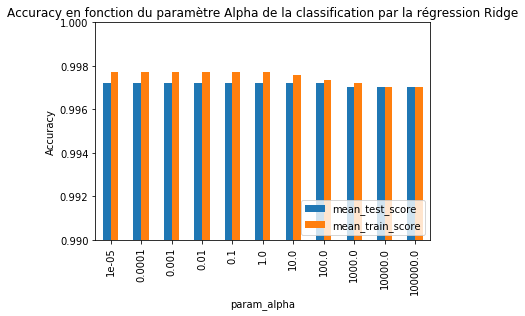

In [24]:
df_Rigde_CV_results.set_index(["param_alpha"])[["mean_test_score",
                                      "mean_train_score"]].plot(
                                          kind="bar", ylim=(0.99, 1))
plt.ylabel("Accuracy")
plt.title("Accuracy en fonction du paramètre Alpha de la classification par la régression Ridge")
plt.legend(loc="lower right")
plt.show()

In [25]:
print("Best Alpha parameter pour Ridge : ")
print(gridSearch_Ridge_CV.best_params_["alpha"])

Best Alpha parameter pour Ridge : 
1e-05


On teste le meilleur modèle avec le $alpha$ ci-dessus sur l'ensemble de test de notre jeu de données en prenant toujours comme métrique l'accuracy.

In [26]:
print("Score sur le test : ", gridSearch_Ridge_CV.score(X_Test,y_Test))

Score sur le test :  0.9988158673771462


On peut aussi afficher la matrice de confusion et retrouver la valeur de l'accuracy calculé ci-dessus

In [27]:
from sklearn.metrics import confusion_matrix
y_TestPredicted = gridSearch_Ridge_CV.predict(X_Test)
confusion_matrix(y_Test, y_TestPredicted)

array([[852,   2],
       [  0, 835]], dtype=int64)

In [28]:
accuracy = (852+835)/(852+835+2+0)
accuracy

0.9988158673771462

Essayons de regarder les coefficients de la régression pour identifier les valeurs les plus significatives sur le meilleur estimateur.

In [29]:
coefficients = pd.Series(gridSearch_Ridge_CV.best_estimator_.coef_.flatten(), index=X.columns).sort_values(ascending=False)
coefficients

qg    0.113849
vt    0.106481
jr    0.103378
qn    0.089276
qd    0.088788
        ...   
tx   -0.108339
jf   -0.110442
jz   -0.115988
jj   -0.157456
qj   -0.169903
Length: 695, dtype: float64

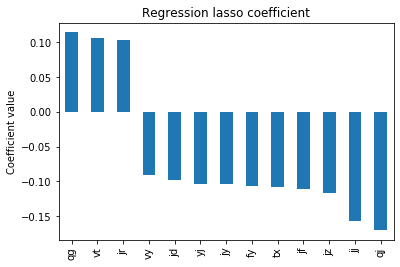

In [30]:
coefficients[np.abs(coefficients)>0.09].plot(kind="bar")
plt.title("Regression lasso coefficient")
plt.ylabel("Coefficient value")
plt.show()

Les poids les plus importants sont données à des suites de 2 lettres qui doivent avoir un caractère discriminant entre les deux langues

### Régression linéaire Lasso

La régression linéaire Lasso est une alternative à Ridge en utilisant une régularisation L1 du vecteur de pondération. La conséquence de la régularisation Lasso est que certains coefficients valent exactement 0 et donc sont totalement ignorées par le modèle. 

Dans le cas de scikit Learn, nous n'avons pas trouvé de LassoClassifier. Nous allons implémenter la validation croisée et la recherche sur grille sur l'ensemble de train en utilisant la regressionLasso de Scikit Learn. 

In [31]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True)
scores_lasso ={}
for regul in np.logspace(-5,5,11):
    clfLasso = Lasso(alpha=regul)
    scores_regul = []
    k=0
    for train_index, test_index in kf.split(X_Train):
        k=k+1
        X_train_k = X_Train.iloc[train_index,:]
        X_test_k  = X_Train.iloc[test_index,:]
        y_train_k = y_Train[train_index]
        y_test_k  = y_Train[test_index]
        clfLasso.fit(X_train_k, y_train_k)
        y_pred=clfLasso.predict(X_test_k)
        scores_tmp=( np.sum( y_pred[y_test_k==-1] > 0 ) + np.sum( y_pred[y_test_k==1] < 0 ) ) / y_pred.shape[0]
        scores_regul.append(scores_tmp)
    scores_lasso[regul] = np.mean(scores_regul) 
    print("Proba d'erreur moyenne =  " + str(scores_lasso[regul]) + " pour regul = " + str(regul) )

C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.293014750295423, tolerance: 0.5398777202072546
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.897738801720216, tolerance: 0.5402200925069381
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.362311523497965, tolerance: 0.5395466419981495
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

Proba d'erreur moyenne =  0.002959784336826983 pour regul = 1e-05


C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.42487867818446, tolerance: 0.5400268689859367
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.85078075635754, tolerance: 0.5402637557816837
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.9093891500524, tolerance: 0.5398530249768735
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

Proba d'erreur moyenne =  0.0028124028223669513 pour regul = 0.0001


C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.72775149472757, tolerance: 0.5396745373797193
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.537940130977304, tolerance: 0.5400322664199811
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.58235230942361, tolerance: 0.540246734505088
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

Proba d'erreur moyenne =  0.0029605508082989145 pour regul = 0.001


C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9399188457655612, tolerance: 0.540256698741673
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6410420093816072, tolerance: 0.5401321739130435
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4514096348511885, tolerance: 0.5396918408880668
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

Proba d'erreur moyenne =  0.0029600033286761073 pour regul = 0.01
Proba d'erreur moyenne =  0.0035520477927811532 pour regul = 0.1
Proba d'erreur moyenne =  0.004144530240584444 pour regul = 1.0
Proba d'erreur moyenne =  0.005032651684704295 pour regul = 10.0
Proba d'erreur moyenne =  0.48564245638777326 pour regul = 100.0
Proba d'erreur moyenne =  0.48564311336332067 pour regul = 1000.0
Proba d'erreur moyenne =  0.4856438798347925 pour regul = 10000.0
Proba d'erreur moyenne =  0.4856416899163013 pour regul = 100000.0


In [32]:
best_score = 1000
for regul,score in scores_lasso.items():
    if(score < best_score):
        best_score = score
        best_param = regul
print("Best Alpha parameter pour Lasso : " + str(best_param))

Best Alpha parameter pour Lasso : 0.0001


In [33]:
clfBestLasso = Lasso(alpha=best_param)
clfBestLasso.fit(X_Train,y_Train)
y_TestPredicted = clfBestLasso.predict(X_Test)
print("Nmobre de features utilisées avec le meilleur paramétrage : {}".format(np.sum(clfBestLasso.coef_ != 0)))

Nmobre de features utilisées avec le meilleur paramétrage : 534


C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.617048564225854, tolerance: 0.6750429248075782
  positive)


On peut regarder la matrice de confusion sur le test

In [34]:
y_TestClass = []
for val in y_TestPredicted :
    if(val<0):
        y_TestClass.append(-1)
    else:
        y_TestClass.append(1)

In [35]:
confusion_matrix(y_Test, y_TestClass)

array([[852,   2],
       [  0, 835]], dtype=int64)

La régression linéaire de type Lasso ou Ridge donne des résultats similaires. On peut aussi voir que la régularisation très faible est identique dans les 2 modèles et donc s'apparente à un modèle de régression linéaire généralisée.

### SVM avec noyau linéaire

Nous utilions un séparateur à vaste marge avec un noyau linéaire pour séparer les 2 classes. On effectue une recherche sur grille avec validation croisée sur l'ensemble de train pour identifier le meilleur paramètre C. 

In [36]:
from sklearn.svm import SVC
# grille de valeurs
params = {"C": np.logspace(-5,5,11) } 
gridSearch_LinearSVM_CV = GridSearchCV(
    estimator = SVC(kernel='linear'),
    param_grid= params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    return_train_score=True)
gridSearch_LinearSVM_CV.fit(X_Train,y_Train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

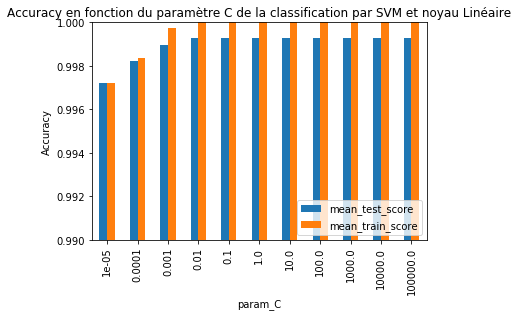

In [37]:
df_LinearSVM_CV_results = pd.DataFrame(gridSearch_LinearSVM_CV.cv_results_)
df_LinearSVM_CV_results.set_index(["param_C"])[["mean_test_score",
                                      "mean_train_score"]].plot(
                                          kind="bar", ylim=(0.99, 1))
plt.ylabel("Accuracy")
plt.title("Accuracy en fonction du paramètre C de la classification par SVM et noyau Linéaire")
plt.legend(loc="lower right")
plt.show()

In [38]:
print("Best C parameter pour SVM : ")
print(gridSearch_LinearSVM_CV.best_params_["C"])

Best C parameter pour SVM : 
0.01


In [39]:
print("Score sur le test : ", gridSearch_LinearSVM_CV.score(X_Test,y_Test))

Score sur le test :  1.0


In [40]:
y_TestPredicted = gridSearch_LinearSVM_CV.predict(X_Test)
confusion_matrix(y_Test, y_TestPredicted)

array([[854,   0],
       [  0, 835]], dtype=int64)

In [41]:
print("support vectors")
print(gridSearch_LinearSVM_CV.best_estimator_.support_vectors_)
print("\nNumber of support vectors for each class")
print(gridSearch_LinearSVM_CV.best_estimator_.n_support_)

support vectors
[[88. 17. 56. ...  0.  0.  0.]
 [78.  7. 25. ...  0.  0.  0.]
 [68. 13. 26. ...  0.  0.  0.]
 ...
 [92.  7. 15. ...  0.  0.  0.]
 [71.  3. 23. ...  0.  0.  0.]
 [75.  3. 37. ...  0.  0.  0.]]

Number of support vectors for each class
[13 48]


Le nombre de points séparateurs pour réaliser le SVM est une information intéressante car sont les points discriminants dans le cas de cette méthode

### Régression Logistique

La régression logistique est aussi une méthode adaptée et une extension de la régression linéaire pour réaliser de la classification en utilisant une fonction Logit.

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# grille de valeurs
params = {"C": np.logspace(-5, 5, 11) } 
gridSearch_LogisticRegression_CV = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid= params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    return_train_score=True)
gridSearch_LogisticRegression_CV.fit(X_Train,y_Train)

C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

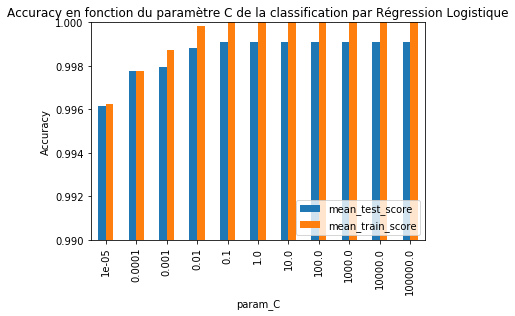

In [43]:
df_LogisticRegression_CV_results = pd.DataFrame(gridSearch_LogisticRegression_CV.cv_results_)
df_LogisticRegression_CV_results.set_index(["param_C"])[["mean_test_score",
                                      "mean_train_score"]].plot(
                                          kind="bar", ylim=(0.99, 1))
plt.ylabel("Accuracy")
plt.title("Accuracy en fonction du paramètre C de la classification par Régression Logistique")
plt.legend(loc="lower right")
plt.show()

In [44]:
print("Best C parameter pour Regression Logistique : ")
print(gridSearch_LogisticRegression_CV.best_params_["C"])

Best C parameter pour Regression Logistique : 
0.1


In [45]:
print("Score sur le test : ", gridSearch_LogisticRegression_CV.score(X_Test,y_Test))

Score sur le test :  0.9994079336885732


In [46]:
y_TestPredicted = gridSearch_LogisticRegression_CV.predict(X_Test)
confusion_matrix(y_Test, y_TestPredicted)

array([[853,   1],
       [  0, 835]], dtype=int64)

### Conclusion

* La classification entre 2 langues est très bonne avec les différents modèles linéaires : Rigde, Lasso, SVM, Régression Logistique.  
* En se basant sur les occurences des caractères, les modèles linéaires arrivent à discriminer 2 langues. 

### Réduction de la dimension

L'analyse en composantes principales est une méthode qui transforme des caractéristiques dites corrélées en caractéristiques non corrélées que l'on appelle composante principale exprimée comme une combinaison linéaire des features initiales. Cette phase est souvent suivi par la sélection d'un sous-ensemble des nouvelles caractéristiques, selon l'importance qu'elles présentent pour la compréhension des données. L'une des applications les plus courantes de la PCA est la visualisation de jeux de données multidimensionnels pour réduire le nombre de dimension dans un espace inférieur à 3 afin de le représenter.

#### Visualisation des données via PCA

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Normalisation des données : centrage et réduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Application de la PCA
pca = PCA(n_components=3, random_state=0)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print("Shape de départ : {}".format(str(X_scaled.shape)))
print("Shape après PCA : {}".format(str(X_pca.shape)))

Shape de départ : (8445, 695)
Shape après PCA : (8445, 3)


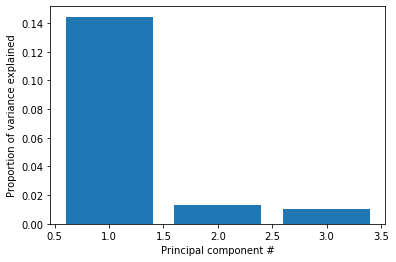

[0.14438991 0.0134324  0.01046494]


In [48]:
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.show()
print(pca.explained_variance_ratio_)

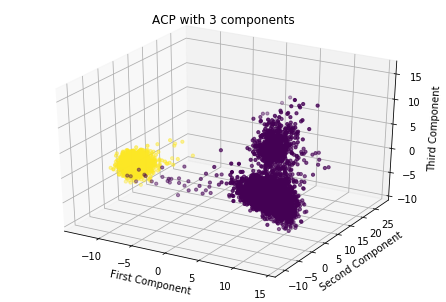

In [49]:
import matplotlib.pyplot as plt
# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
fig = pylab.figure(1)
ax = Axes3D(fig)
size_vertex_plot = 50
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2], s=10, c=y)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
plt.title('ACP with 3 components') 
pyplot.show() 

La variance expliquée à travers les trois composantes principales est uniquement de 16% mais permet déjà de visualiser une séparation assez claire des 2 langues à travers la représentation graphique.

#### Modèle de régression logistique suite à une PCA

L'objectif est de voir la qualité d'une régression logistique suite à une réduction via PCA de la dimension initiale du problème.

In [50]:
scaler = StandardScaler()
X_Train_scaled = scaler.fit_transform(X_Train)

#Application de la PCA
pca = PCA(n_components=3, random_state=0)
pca.fit(X_Train_scaled)
X_pca_Train = pca.transform(X_Train_scaled)

# grille de valeurs
params = {"C": np.logspace(-5, 5, 11) } 
gridSearch_LogisticRegressionWithPCA_CV = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid= params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    return_train_score=True)
gridSearch_LogisticRegressionWithPCA_CV.fit(X_pca_Train,y_Train)

C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

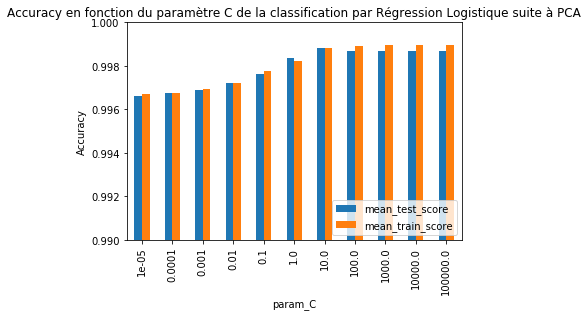

In [51]:
df_LogisticRegressionPCA_CV_results = pd.DataFrame(gridSearch_LogisticRegressionWithPCA_CV.cv_results_)
df_LogisticRegressionPCA_CV_results.set_index(["param_C"])[["mean_test_score",
                                      "mean_train_score"]].plot(
                                          kind="bar", ylim=(0.99, 1))
plt.ylabel("Accuracy")
plt.title("Accuracy en fonction du paramètre C de la classification par Régression Logistique suite à PCA")
plt.legend(loc="lower right")
plt.show()

In [52]:
print("Best C parameter pour Regression Logistique suite à PCA : ")
print(gridSearch_LogisticRegressionWithPCA_CV.best_params_["C"])

Best C parameter pour Regression Logistique suite à PCA : 
10.0


In [53]:
X_Test_scaled = scaler.transform(X_Test)
X_pca_Test = pca.transform(X_Test_scaled)
print("Score sur le test : ", gridSearch_LogisticRegressionWithPCA_CV.score(X_pca_Test,y_Test))

Score sur le test :  0.9994079336885732


In [54]:
y_TestPredicted = gridSearch_LogisticRegressionWithPCA_CV.predict(X_pca_Test)
confusion_matrix(y_Test, y_TestPredicted)

array([[853,   1],
       [  0, 835]], dtype=int64)

La régression logistique appliquée à une analyse en composante principale permet d'obtenir des résultats très proches par rapport à la dimension initiale du problème en prenant uniquement les 3 premières composantes principales. L'analyse graphique est confirmée par la classification suite à l'ACP.

## Méthode de classification non linéaire et réduction 

### Réduction de la dimension via KPCA

In [55]:
from sklearn.decomposition import KernelPCA

#Application de la PCA
kpca =  KernelPCA(kernel="rbf",n_components=3, random_state=0)
kpca.fit(X_scaled)
X_kpca = kpca.transform(X_scaled)

print("Shape de départ : {}".format(str(X_scaled.shape)))
print("Shape après KPCA : {}".format(str(X_kpca.shape)))

C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


Shape de départ : (8445, 695)
Shape après KPCA : (8445, 3)


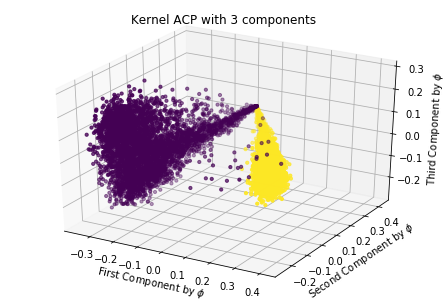

In [56]:
import matplotlib.pyplot as plt
# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
fig = pylab.figure(1)
ax = Axes3D(fig)
size_vertex_plot = 50
ax.scatter(X_kpca[:,0],X_kpca[:,1],X_kpca[:,2], s=10, c=y)
ax.set_xlabel('First Component by $\phi$')
ax.set_ylabel('Second Component by $\phi$')
ax.set_zlabel('Third Component by $\phi$')
plt.title('Kernel ACP with 3 components') 
pyplot.show() 

KPCA permet déjà de visualiser une séparation assez claire des 2 langues à travers la représentation graphique.

### Modèle SVM Gaussien suite à KPCA

Nous avons deux hyperparamètres à optimiser $C$ et $gamma$ que nous réalisons à travers une validation croisée et une recherche sur grille.

In [57]:
#Application de KPCA avec noyau gaussien et 3 composantes
kpca = KernelPCA(kernel="rbf",n_components=3, random_state=0)
kpca.fit(X_Train_scaled)
X_kpca_Train = kpca.transform(X_Train_scaled)

# grille de valeurs
params = {"C": np.logspace(-5, 5, 11), "gamma":np.logspace(-5, 5, 11) } 
gridSearch_SVMGaussienWithKPCA_CV = GridSearchCV(
    estimator = SVC(kernel='rbf'),
    param_grid= params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    return_train_score=True)
gridSearch_SVMGaussienWithKPCA_CV.fit(X_kpca_Train,y_Train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
                         'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [58]:
print("Best parameters pour SVM Gaussien suite à KPCA : ")
print(gridSearch_SVMGaussienWithKPCA_CV.best_params_)

Best parameters pour SVM Gaussien suite à KPCA : 
{'C': 1000.0, 'gamma': 100.0}


In [59]:
X_kpca_Test = kpca.transform(X_Test_scaled)
print("Score sur le test : ", gridSearch_SVMGaussienWithKPCA_CV.score(X_kpca_Test,y_Test))

Score sur le test :  0.9976317347542925


In [60]:
y_TestPredicted = gridSearch_SVMGaussienWithKPCA_CV.predict(X_kpca_Test)
confusion_matrix(y_Test, y_TestPredicted)

array([[853,   1],
       [  3, 832]], dtype=int64)

On arrive à une bonne classification via la méthode non linéaire SVM en utilisant le noyau gaussien en réduisant l'espace de départ via KPCA. Néanmoins, l'intérêt d'une approche non-linéaire ne semble pas à privilégier par rapport à une approche linéaire car les résultats sont sensiblement identiques et l'approche linéaire est plus simple mathématiquement et le temps de calcul est aussi bien moindre (j'ai essayé avant KCPA de faire un SVM avec noyau gaussien en optimisant les hyperparamètres sur la matrice de données initiales et j'ai abandonné à la vue du temps de calcul).

# Classification à N Classes

## Construction des ensembles X,y,Train et Test

### Ensemble X,y

In [61]:
def BuildFeatureAndTargetAll():
    
    X = pd.concat([df_german,df_french,df_english,df_spanish], ignore_index=True)
    
    targetGerman = np.array([1 for i in range(df_german.shape[0])])
    targetFrench = np.array([2 for i in range(df_french.shape[0])])
    targetEnglish = np.array([3 for i in range(df_english.shape[0])])
    targetSpanish = np.array([4 for i in range(df_spanish.shape[0])])
    
    y = np.append(np.append(np.append(targetGerman,targetFrench), targetEnglish), targetSpanish, axis = 0)
    
    print("Shape de X : " + str(X.shape))
    print("Shape de y : " + str(y.shape))
    return(X,y)

In [62]:
X,y = BuildFeatureAndTargetAll()

Shape de X : (16975, 696)
Shape de y : (16975,)


### Séparation entre Train et Test

On prend 80% des données pour le train et 20% pour le test

In [63]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=123)
print("Taille de X_train : " + str(X_Train.shape))
print("Taille de y_Train : " + str(y_Train.shape))
print("Taille de X_test : " + str(X_Test.shape))
print("Taille de y_Test : " + str(y_Test.shape))

Taille de X_train : (13580, 696)
Taille de y_Train : (13580,)
Taille de X_test : (3395, 696)
Taille de y_Test : (3395,)


## Approche One vs All

L'approche One vs All consiste à considérer 4 classifieurs qui permettent de tester chaque classe contre toutes les autres

### Modèle Régression logistique

Le modèle que nous utilisons est une régression logistique dans l'approche One vs All avec optimisation de l'hyperparamètre de la régression logistique. 

In [64]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# grille de valeurs
modele = OneVsRestClassifier(LogisticRegression())

params = {"estimator__C": np.logspace(-5, 5, 11) } 
model_tunning = GridSearchCV(
    estimator = modele,
    param_grid= params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    return_train_score=True)
model_tunning.fit(X_Train,y_Train)

C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=OneVsRestClassifier(estimator=LogisticRegression(C=1.0,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='warn',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                                                                        r

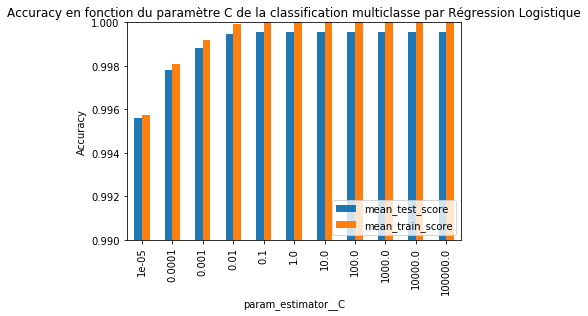

In [65]:
df_OnevsAll_LogisticRegression_CV_results = pd.DataFrame(model_tunning.cv_results_)
df_OnevsAll_LogisticRegression_CV_results.set_index(["param_estimator__C"])[["mean_test_score",
                                      "mean_train_score"]].plot(
                                          kind="bar", ylim=(0.99, 1))
plt.ylabel("Accuracy")
plt.title("Accuracy en fonction du paramètre C de la classification multiclasse par Régression Logistique")
plt.legend(loc="lower right")
plt.show()

In [66]:
print("Best C parameter pour Regression Logistique multiclasse : ")
print(model_tunning.best_params_)

Best C parameter pour Regression Logistique multiclasse : 
{'estimator__C': 0.1}


In [67]:
print("Score sur le test : ", model_tunning.score(X_Test,y_Test))

Score sur le test :  1.0


In [68]:
y_TestPredicted = model_tunning.predict(X_Test)
confusion_matrix(y_Test, y_TestPredicted)

array([[851,   0,   0,   0],
       [  0, 843,   0,   0],
       [  0,   0, 833,   0],
       [  0,   0,   0, 868]], dtype=int64)

100% des langues sont bien classifiées suite à optimisation de l'hyperparamètre !

### Modèle SVM linéaire après réduction de la dimension

#### Visualisation des données via PCA

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Normalisation des données : centrage et réduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Application de la PCA
pca = PCA(n_components=3, random_state=0)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print("Shape de départ : {}".format(str(X_scaled.shape)))
print("Shape après PCA : {}".format(str(X_pca.shape)))

Shape de départ : (16975, 696)
Shape après PCA : (16975, 3)


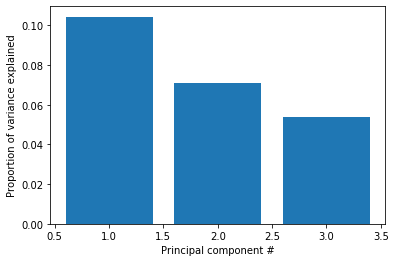

[0.10433837 0.071035   0.0539544 ]


In [70]:
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.show()
print(pca.explained_variance_ratio_)

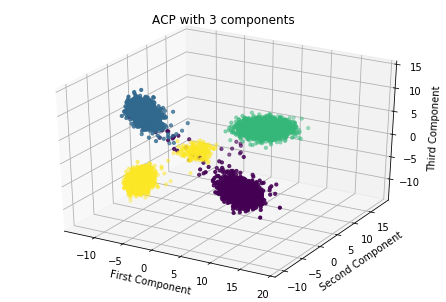

In [71]:
import matplotlib.pyplot as plt
# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
fig = pylab.figure(1)
ax = Axes3D(fig)
size_vertex_plot = 50
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2], s=10, c=y)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
plt.title('ACP with 3 components') 
pyplot.show() 

Les quatres langues semblent assez distinctes suite à une ACP expliquant 22% de la variance sur les 3 premières composantes.

#### Application d'un SVM linéaire suite à réduction de la dimension après PCA

In [72]:
scaler = StandardScaler()
X_Train_scaled = scaler.fit_transform(X_Train)

#Application de la PCA
pca = PCA(n_components=3, random_state=0)
pca.fit(X_Train_scaled)
X_pca_Train = pca.transform(X_Train_scaled)

modele = OneVsRestClassifier(SVC(kernel='linear'))

params = {"estimator__C": np.logspace(-5, 5, 11) } 
model_tunning = GridSearchCV(
    estimator = modele,
    param_grid= params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    return_train_score=True)
model_tunning.fit(X_pca_Train,y_Train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200,
                                                         class_weight=None,
                                                         coef0=0.0,
                                                         decision_function_shape='ovr',
                                                         degree=3,
                                                         gamma='auto_deprecated',
                                                         kernel='linear',
                                                         max_iter=-1,
                                                         probability=False,
                                                         random_state=None,
                                                         shrinking=True,
                                                         tol=0.001,
                                                  

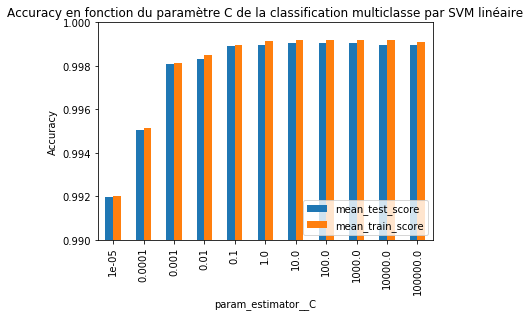

In [73]:
df_OnevsAll_SVMWithPCA_CV_results = pd.DataFrame(model_tunning.cv_results_)
df_OnevsAll_SVMWithPCA_CV_results.set_index(["param_estimator__C"])[["mean_test_score",
                                      "mean_train_score"]].plot(
                                          kind="bar", ylim=(0.99, 1))
plt.ylabel("Accuracy")
plt.title("Accuracy en fonction du paramètre C de la classification multiclasse par SVM linéaire")
plt.legend(loc="lower right")
plt.show()

In [74]:
print("Best C parameter pour SVM linéaire multiclasse : ")
print(model_tunning.best_params_)

Best C parameter pour SVM linéaire multiclasse : 
{'estimator__C': 10.0}


In [75]:
X_Test_scaled = scaler.transform(X_Test)
X_pca_Test = pca.transform(X_Test_scaled)
print("Score sur le test : ", model_tunning.score(X_pca_Test,y_Test))

Score sur le test :  0.9997054491899853


In [76]:
y_TestPredicted = model_tunning.predict(X_pca_Test)
confusion_matrix(y_Test, y_TestPredicted)

array([[851,   0,   0,   0],
       [  1, 842,   0,   0],
       [  0,   0, 833,   0],
       [  0,   0,   0, 868]], dtype=int64)

La classification multiclasse en effectuant au préalable une réduction de dimension au trois premières composantes principales avec un SVM linéaire permet aussi d'avoir des résultats très bons.

## Approche Classification 2 à 2

Dans le cas présent, on entraine 6 classifieurs en faisant des comparaisons 2 à 2 entre les langues.

### Modèle de régression logistique

In [77]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# grille de valeurs
modele = OneVsOneClassifier(LogisticRegression())

params = {"estimator__C": np.logspace(-5, 5, 11) } 
model_tunning = GridSearchCV(
    estimator = modele,
    param_grid= params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    return_train_score=True)
model_tunning.fit(X_Train,y_Train)

C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=OneVsOneClassifier(estimator=LogisticRegression(C=1.0,
                                                                       class_weight=None,
                                                                       dual=False,
                                                                       fit_intercept=True,
                                                                       intercept_scaling=1,
                                                                       l1_ratio=None,
                                                                       max_iter=100,
                                                                       multi_class='warn',
                                                                       n_jobs=None,
                                                                       penalty='l2',
                                                                       random_state

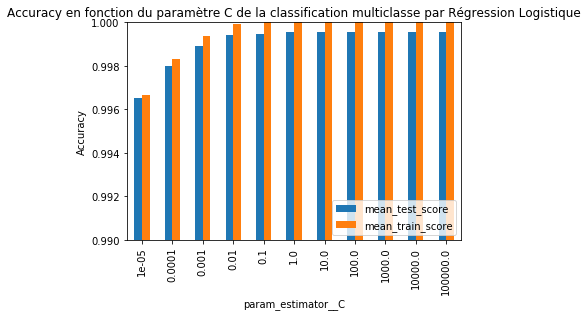

In [78]:
df_OnevsOne_LogisticRegression_CV_results = pd.DataFrame(model_tunning.cv_results_)
df_OnevsOne_LogisticRegression_CV_results.set_index(["param_estimator__C"])[["mean_test_score",
                                      "mean_train_score"]].plot(
                                          kind="bar", ylim=(0.99, 1))
plt.ylabel("Accuracy")
plt.title("Accuracy en fonction du paramètre C de la classification multiclasse par Régression Logistique")
plt.legend(loc="lower right")
plt.show()

In [79]:
print("Best C parameter pour Regression Logistique multiclasse : ")
print(model_tunning.best_params_)

Best C parameter pour Regression Logistique multiclasse : 
{'estimator__C': 1.0}


In [80]:
print("Score sur le test : ", model_tunning.score(X_Test,y_Test))

Score sur le test :  1.0


In [81]:
y_TestPredicted = model_tunning.predict(X_Test)
confusion_matrix(y_Test, y_TestPredicted)

array([[851,   0,   0,   0],
       [  0, 843,   0,   0],
       [  0,   0, 833,   0],
       [  0,   0,   0, 868]], dtype=int64)

### Modèle SVM linéaire après réduction de la dimension

In [82]:
modele = OneVsOneClassifier(SVC(kernel='linear'))

params = {"estimator__C": np.logspace(-5, 5, 11) } 
model_tunning = GridSearchCV(
    estimator = modele,
    param_grid= params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    return_train_score=True)
model_tunning.fit(X_pca_Train,y_Train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=OneVsOneClassifier(estimator=SVC(C=1.0, cache_size=200,
                                                        class_weight=None,
                                                        coef0=0.0,
                                                        decision_function_shape='ovr',
                                                        degree=3,
                                                        gamma='auto_deprecated',
                                                        kernel='linear',
                                                        max_iter=-1,
                                                        probability=False,
                                                        random_state=None,
                                                        shrinking=True,
                                                        tol=0.001,
                                                        verbos

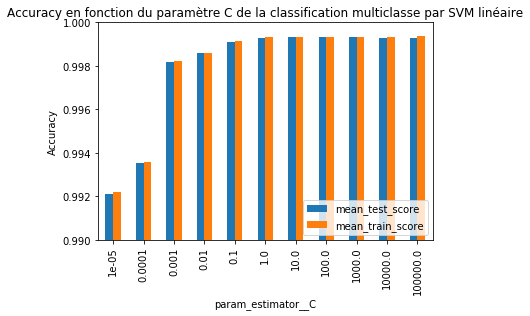

In [83]:
df_OnevsOne_SVMWithPCA_CV_results = pd.DataFrame(model_tunning.cv_results_)
df_OnevsOne_SVMWithPCA_CV_results.set_index(["param_estimator__C"])[["mean_test_score",
                                      "mean_train_score"]].plot(
                                          kind="bar", ylim=(0.99, 1))
plt.ylabel("Accuracy")
plt.title("Accuracy en fonction du paramètre C de la classification multiclasse par SVM linéaire")
plt.legend(loc="lower right")
plt.show()

In [84]:
print("Best C parameter pour SVM linéaire multiclasse : ")
print(model_tunning.best_params_)

Best C parameter pour SVM linéaire multiclasse : 
{'estimator__C': 10.0}


In [85]:
print("Score sur le test : ", model_tunning.score(X_pca_Test,y_Test))

Score sur le test :  1.0


In [86]:
y_TestPredicted = model_tunning.predict(X_pca_Test)
confusion_matrix(y_Test, y_TestPredicted)

array([[851,   0,   0,   0],
       [  0, 843,   0,   0],
       [  0,   0, 833,   0],
       [  0,   0,   0, 868]], dtype=int64)

Aux vues des résultats, la méthode OnevsAll semble à privilégier car OnevsOne est extrêmement calculatoire. Par contre, la réduction de dimension dans le cas présent peut être une bonne solution car l'impact sur les résultats finaux est faible voir négligeable.

# Conclusion générale

* Les différentes méthodes de classification donnent de bon résultats et permettent de classifier avec une très bonne précision le corpus de texte sur base de l'occurence d'une et 2 lettres.
* La méthode que je privilégie est une méthode de régression logistique ou SVM linéaire qui peut se faire suite à une réduction de dimension de l'espace initiale.
* Dans le cas présent, les approches non linéaires ne semblent pas à considérer
* A titre individuel, ce projet m'a permis pour la première fois d'expérimenter la validation croisée et la recherche sur grille pour optimiser les hyperparamètres d'un modèle. L'utilisation de Pylab permet aussi d'avoir des représentations en 3D intéressantes pour la visualisation des données.